<a href="https://colab.research.google.com/github/diggajbishnoi/Projects/blob/main/EMT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ***Load Image:-***

In [49]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

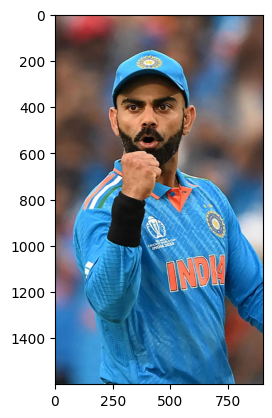

In [59]:
filename = "virat.jpg"
img = read_file(filename)

org_img = np.copy(img)

### **Create Edge Mask:-** used to create more edges which helps in cartoonifying an image.

In [51]:
def edge_mask(img , line_size,blur_value):
  """
  input: Input Image
  Output: Edges of Images
  """
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)

  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C ,
                                cv2.THRESH_BINARY, line_size , blur_value)

  return edges

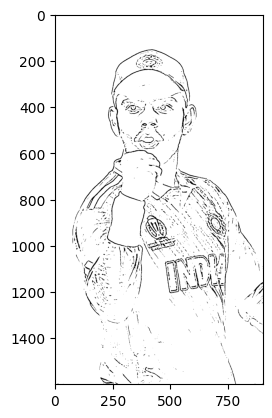

In [52]:
line_size, blur_value=7,7
edges = edge_mask(img , line_size,blur_value)

plt.imshow(edges , cmap='gray')
plt.show()

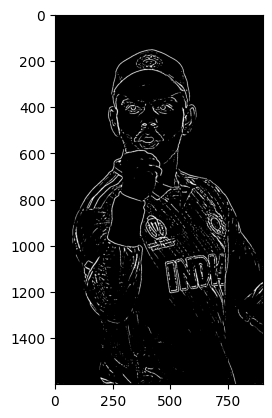

In [53]:
line_size, blur_value=7,7
edges = edge_mask(img , line_size,blur_value)

plt.imshow(edges , cmap='binary')
plt.show()

### **Reduce the Color Palette**

In [54]:
def color_quantization(img , k):

  # Transform the image
  data = np.float32(img).reshape((-1,3))

  # Determine Criteria
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.01)

  ## Implementing K-Means

  ret , label , center = cv2.kmeans(data, k, None , criteria, 10, cv2.KMEANS_RANDOM_CENTERS )
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  return result

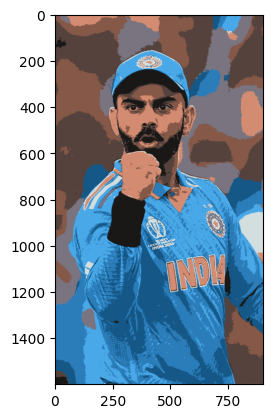

In [55]:
img = color_quantization(img , k=9)

plt.imshow(img)
plt.show()

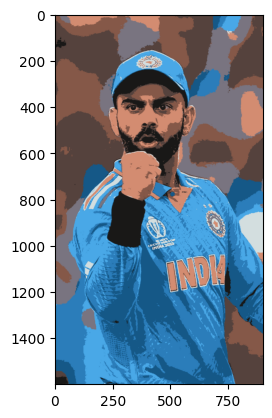

In [56]:
## Reduce Noise

blurred = cv2.bilateralFilter(img , d = 3, sigmaColor= 200, sigmaSpace= 200)

plt.imshow(blurred)
plt.show()

# **Combine Edge Msk with image:**-

In [62]:
def cartoon(blurred):
    c = cv2.bitwise_and(blurred , blurred , mask= edges )

    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()


    plt.imshow(org_img)
    plt.title("Original Image")
    plt.show()

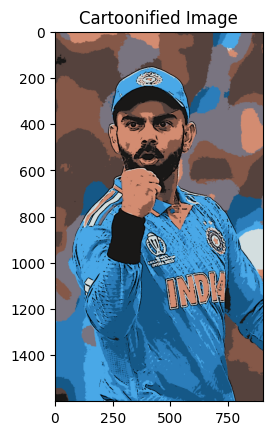

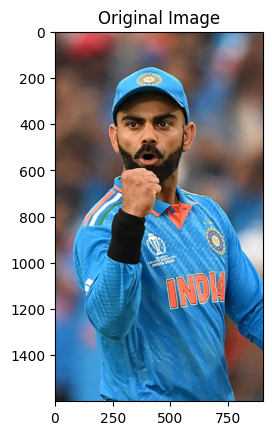

In [63]:
cartoon(blurred)